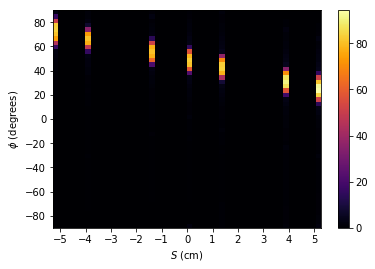

In [3]:
import numpy as np
import pandas as pd
import os
from scipy import odr
from skimage.transform import iradon, rescale
from skimage.transform import iradon_sart
from skimage.transform import radon
import math
import matplotlib.pyplot as plt
from pylab import *
from random import *

file='sinogramma_corretto.txt'

phi_s_ncr = np.recfromcsv(file, names=['phi','s','ncr'])
datisinogramma = np.asarray(phi_s_ncr)
phi = phi_s_ncr['phi']
s = phi_s_ncr['s']
n_bins = 50

#SINOGRAM
plt.clf() 
my_xticks = np.arange(-100, 90, 20) 
my_yticks = np.arange(-8, 11, 1) 
plt.xticks( my_xticks)
plt.yticks( my_yticks)
sinogram, xax, yax, imagesinogram = plt.hist2d(phi,s, bins= n_bins , weights=phi_s_ncr['ncr'], cmap=plt.cm.inferno, cmin=None, cmax=None, hold=None, data=None)
plt.savefig("sinogramma.png",dpi=300)
#plt.colorbar()
plt.xlabel("$\phi$ (degrees)")
plt.ylabel("$S$ (cm)")
plt.title('Sinogram')
#plt.show()

#SINOGRAM TRASP
plt.clf()
my_yticks = np.arange(-100, 90, 20)
my_xticks = np.arange(-11, 11, 1) 
plt.xticks( my_xticks)
plt.yticks( my_yticks)
sinogram_tras, xax_tras, yax_tras, imagesinogram = plt.hist2d(s,phi, bins= n_bins , weights=phi_s_ncr['ncr'], cmap=plt.cm.inferno, cmin=None, cmax=None, hold=None, data=None)
plt.savefig("sinogramma_tras.png",dpi=300)
plt.colorbar()
plt.ylabel("$\phi$ (degrees)")
plt.xlabel("$S$ (cm)")
#plt.title('Sinogramma')
plt.show()

#HEX SINOGRAM
plt.clf()
my_xticks = np.arange(-100, 90, 20)
my_yticks = np.arange(-8, 11, 1.5)
plt.xticks( my_xticks)
plt.yticks( my_yticks)
plt.hexbin(phi_s_ncr['phi'], phi_s_ncr['s'], C=phi_s_ncr['ncr'], cmap=plt.cm.inferno)
plt.savefig("sinogramma_hex.png",dpi=300)
#plt.show()

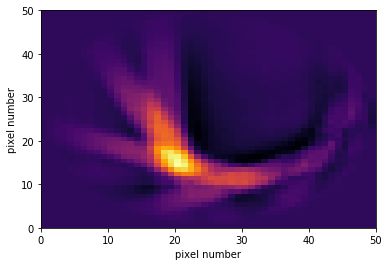

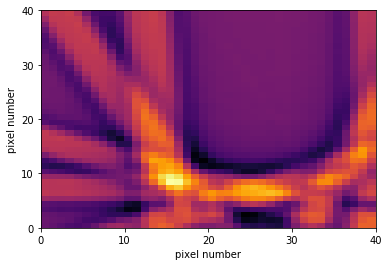

In [4]:
#SART RECONSTRUCTION
reconstruction_sart = iradon_sart(sinogram, theta=None) 
plt.clf()
plt.grid(True)
reconstruction_sart_arr = np.asarray(reconstruction_sart)
reconstruction_tras_sart=reconstruction_sart_arr
#xt=np.arange(-25,25,1)
#yt=np.arange(-25,25,1)
my_xticks = np.arange(0, 60, 10)
my_yticks = np.arange(0,60, 10) 
plt.xticks( my_xticks)
plt.yticks( my_yticks)
plt.ylabel("pixel number")
plt.xlabel("pixel number")
plt.pcolor(reconstruction_tras_sart, cmap=plt.cm.inferno)
#plt.colorbar()
plt.savefig("ricostruzione_sart.png",dpi=300)
#plt.title('SART reconstruction (50x50 pixels)')
plt.show()

m,n = reconstruction_sart.shape 

#FBP RECONSTRUCTION
reconstruction_fbp = iradon(sinogram, theta=None, output_size=40, filter="shepp-logan", interpolation="cubic",circle=False)
plt.clf()
#xt=np.arange(-20,20,1)
#yt=np.arange(-20,20,1)
my_xticks = np.arange(0, 60, 10)
my_yticks = np.arange(0,60, 10) 
plt.xticks( my_xticks)
plt.yticks( my_yticks)
plt.grid(True)
plt.ylabel("pixel number")
plt.xlabel("pixel number")
reconstruction_fbp_arr = np.asarray(reconstruction_fbp)
reconstruction_tras_fbp = reconstruction_fbp_arr
plt.pcolor(reconstruction_tras_fbp, cmap=plt.cm.inferno)
#plt.colorbar()
plt.savefig("ricostruzione_fbp",dpi=300)
#plt.title('FBP reconstruction (50x50 pixels)')
plt.show()


#X AND Y PROJECTIONS

proiezionex = []
proiezioney = []
     
for i in range(0 , m): 
    cumsumx = 0
    #variance_num=0
    for j in range(0 , n):
        cumsumx += reconstruction_tras_sart[i][j]
        #media = cumsumx/n
        #variance_num += (reconstruction_tras_sart[i][j] - media)*(reconstruction_tras_sart[i][j] - media)
        #variance = variance_num/(n-1)
    #if variance < 1:
       # cumsumx=0
    #cumsumx=cumsumx*variance
    #if cumsumx<0:
        #cumsumx=0
    proiezionex.append(cumsumx) 
proiezionex_arr = np.asarray(proiezionex) #era una lista ora è un array

for i in range(0, n): 
    cumsumy = 0
    #variance_num=0
    for j in range (0,m):
        cumsumy += reconstruction_tras_sart[j][i]
        #media = cumsumy/m
        #variance_num += (reconstruction_tras_sart[j][i] - media)*(reconstruction_tras_sart[j][i] - media)
        #variance = variance_num/(m-1)
    #print(variance)
    #cumsumy=abs(cumsumy)
    #if variance < 1:
     #   cumsumy=0
    #if cumsumy<0:
        #cumsumy=0
    #cumsumy=cumsumy*variance
    proiezioney.append(cumsumy)    
proiezioney_arr = np.asarray(proiezioney)

xmaxpos=0
for i in proiezionex_arr:
    if i != max(proiezionex):
        xmaxpos+=1
    if i == max(proiezionex):
        #print(xmaxpos) 
        break
ymaxpos=0
for i in proiezioney_arr:
    if i != max(proiezioney):
        ymaxpos+=1
    if i == max(proiezioney): 
        break
        
#print(xmaxpos,ymaxpos)
#print(len(proiezionex_arr), len(proiezionex_arr)) 
#print(max(proiezioney_arr), max(proiezioney_arr))

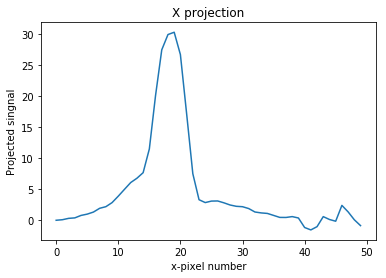

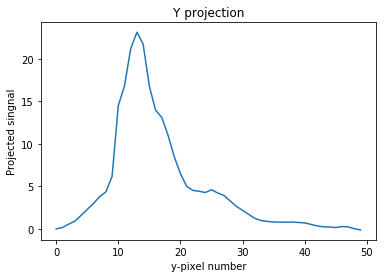

In [5]:
#NOT FITTED GRAPHS

plt.clf()
plt.plot(proiezioney_arr)
plt.title('X projection')
plt.ylabel("Projected singnal")
plt.xlabel("x-pixel number")
plt.show()
fig, ax = plt.subplots()

plt.clf()
plt.plot(proiezionex_arr)
plt.title('Y projection')
plt.ylabel("Projected singnal")
plt.xlabel("y-pixel number")
plt.show()

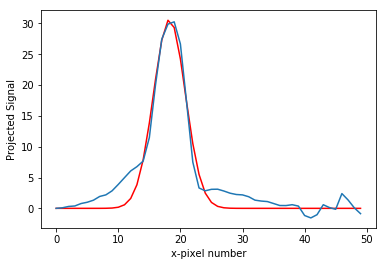

> PIXEL: X-center: 18.239337337090852 Sigma: 2.5687410147272876
> CONVERTED: X-center: 14.861412062261627 Sigma: 2.093010178799794
> X position on the circle: -5.508587937738374


In [6]:
#FITTED X GRAPH

from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def gauss(x, *p):
    a, b, c = p
    y = a*np.exp(-np.power((x - b), 2.)/(2. * c**2.)) 
    return y

py_initial = [30.0, 20.0, 20.]
x = np.arange(0,n_bins,1)
y = proiezioney_arr
popt, pcov = curve_fit(gauss, x, y, p0 = py_initial)
y_fit = gauss(x, *popt)

fig, ax = plt.subplots()
ax.errorbar(x,y) #,e)
ax.plot(x, y_fit, color = 'red')
ax.set_xlabel(r'x-pixel number')
ax.set_ylabel(r'Projected Signal')
#ax.set_title('Gaussian fit for the x position')
plt.show()

R=20.37
xrealmedia= (popt[1]/n_bins)*(2*R)
xrealsigma= (abs(popt[2])/n_bins)*(2*R)
#valpixel:x=50:2R

print('> PIXEL:' , 'X-center:' , popt[1],'Sigma:', abs(popt[2]))
print('> CONVERTED:' ,  'X-center:', xrealmedia ,'Sigma:', xrealsigma)
xpos = (xrealmedia - R)
print('> X position on the circle:', xpos)

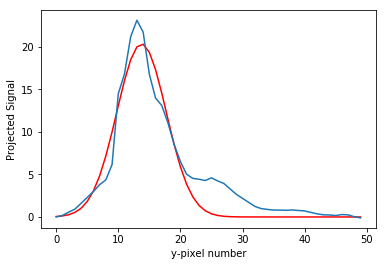

> PIXEL: Y-center: 13.742671231551107 Sigma: 3.9776757433928163
> CONVERTED: Y-center: 11.197528519467843 Sigma: 3.2410101957164668
> Y position on the circle: -9.172471480532158


In [7]:
#FITTED Y GRAPH

px_initial = [10.0, 30.0, 10.]
x = np.arange(0,n_bins,1)
y = proiezionex_arr
popt, pcov = curve_fit(gauss, x, y, p0 = px_initial)
y_fit = gauss(x, *popt)

fig, ax = plt.subplots()
ax.errorbar(x,y) 
ax.plot(x, y_fit, color = 'red')
ax.set_xlabel(r'y-pixel number')
ax.set_ylabel(r'Projected Signal')
#ax.set_title('Gaussian fit for the y position')
plt.show()

yrealmedia= (popt[1]/n_bins)*(2*R)
yrealsigma= (abs(popt[2])/n_bins)*(2*R)

print('> PIXEL:' , 'Y-center:' , popt[1],'Sigma:', popt[2])
print('> CONVERTED:' , 'Y-center:', yrealmedia ,'Sigma:', yrealsigma )
ypos = yrealmedia - R
print('> Y position on the circle:', ypos)

In [8]:
#FINAL RESULT
rho = math.sqrt(xpos**2 + ypos**2)
alpha = 180 - math.degrees(math.asin(ypos/rho))
print('rho:', rho)
print('alpha:', alpha)

rho: 10.69947541372812
alpha: 239.01280168414635
